Q1. Average and Gaussian Filtering

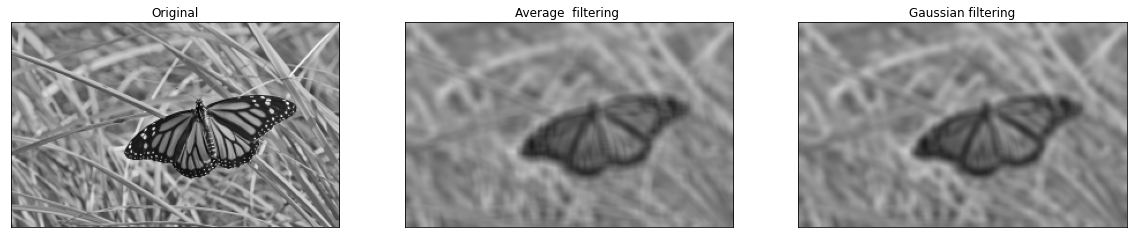

In [15]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('butterfly.jpg',cv.IMREAD_REDUCED_GRAYSCALE_4)
assert img is not None
kernel = np.ones((9,9),np.float32)/81
avg = cv.filter2D(img,-1,kernel)
gaus = cv.GaussianBlur(img,(9,9),sigmaX=4,sigmaY=4)

fig,ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[0].set_title("Original")
ax[1].imshow(cv.cvtColor(avg,cv.COLOR_BGR2RGB))
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("Average  filtering ")
ax[2].imshow(cv.cvtColor(gaus,cv.COLOR_BGR2RGB))
ax[2].set_xticks([]),ax[2].set_yticks([])
ax[2].set_title("Gaussian filtering")
plt.show()

# plt.subplot(131),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Original')
# plt.xticks([]), plt.yticks([])
# plt.subplot(132),plt.imshow(cv.cvtColor(avg,cv.COLOR_BGR2RGB)),plt.title('Averaging')
# plt.xticks([]), plt.yticks([])
# plt.subplot(133),plt.imshow(cv.cvtColor(gaus,cv.COLOR_BGR2RGB)),plt.title('Gaussian')
# plt.xticks([]), plt.yticks([])
# plt.show()

Q2

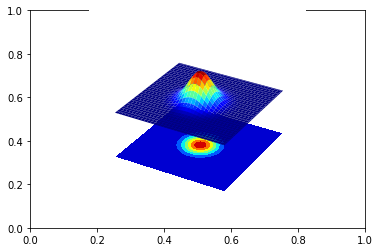

In [87]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig,ax = plt.subplots()
ax = fig.add_subplot(111,projection='3d')
step = 0.1
X = np.arange(-5,5+step,step)
Y = np.arange(-5,5+step,step)
XX,YY = np.meshgrid(X,Y)
sigma = 1.
g = np.exp(-(XX**2+YY**2)/(2*sigma**2))
surf = ax.plot_surface(XX,YY,g,cmap=cm.jet)
cset = ax.contourf(XX,YY,g,zdir='z',offset=np.min(g)-1.5,cmap=cm.jet)
ax.set_zlim(np.min(g)-2,np.max(g))
plt.axis("off")
plt.show()

Q3(a)

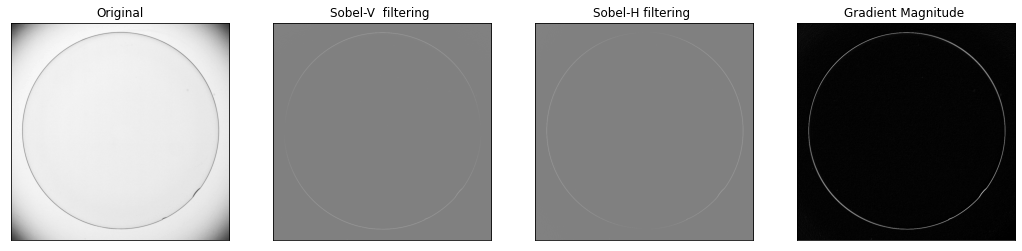

In [34]:
%matplotlib inline
img = cv.imread("contact_lens.tif",cv.IMREAD_GRAYSCALE)
sobelkv = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
sobelkh = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)
sbvimg = cv.filter2D(img,-1,sobelkv)
sbhimg = cv.filter2D(img,-1,sobelkh)
grad_img = np.hypot(sbvimg,sbhimg)

fig,ax = plt.subplots(1,4,figsize=(18,6))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[0].set_title("Original")
ax[1].imshow(sbvimg,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("Sobel-V  filtering ")
ax[2].imshow(sbhimg,cmap='gray',vmin=-1020,vmax=1020)
ax[2].set_xticks([]),ax[2].set_yticks([])
ax[2].set_title("Sobel-H filtering ")
ax[3].imshow(grad_img,cmap='gray')
ax[3].set_xticks([]),ax[3].set_yticks([])
ax[3].set_title("Gradient Magnitude ")
plt.show()

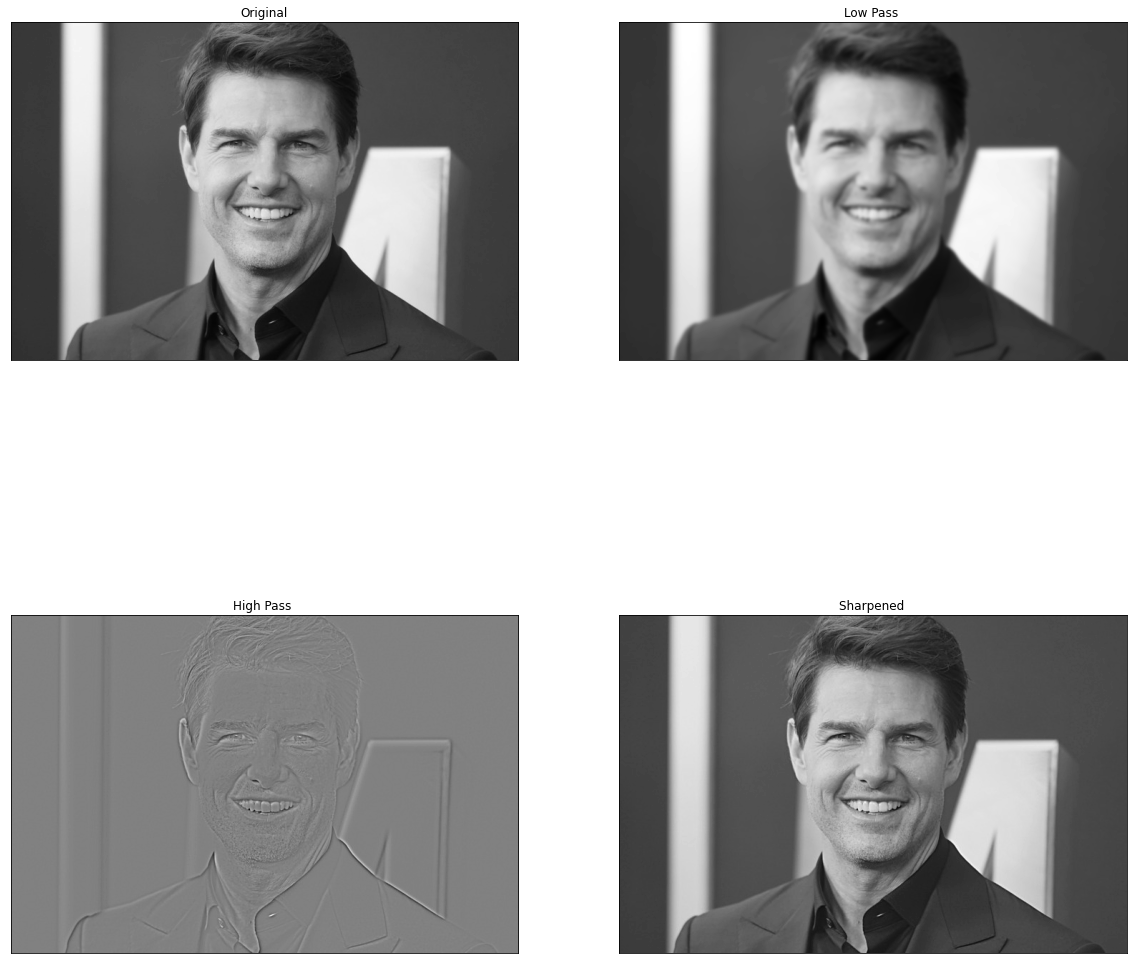

In [76]:
%matplotlib inline
f = cv.imread("tom.jpg",cv.IMREAD_GRAYSCALE).astype(np.float32)

sigma = 2
kernel = cv.getGaussianKernel(20,sigma)
f_lp = cv.sepFilter2D(f,-1,kernel,kernel)
f_hp = f - f_lp
f_sharpned = cv.addWeighted(f,2,f_hp,1,0)
fig,ax = plt.subplots(2,2,figsize=(20,20))
ax[0][0].imshow(f,cmap='gray',vmin=0,vmax=255)
ax[0][0].set_xticks([]),ax[0][0].set_yticks([])
ax[0][0].set_title("Original")
ax[0][1].imshow(f_lp,cmap='gray')
ax[0][1].set_xticks([]),ax[0][1].set_yticks([])
ax[0][1].set_title("Low Pass ")
ax[1][0].imshow(f_hp,cmap='gray')
ax[1][0].set_xticks([]),ax[1][0].set_yticks([])
ax[1][0].set_title("High Pass ")
ax[1][1].imshow(f_sharpned,cmap='gray')
ax[1][1].set_xticks([]),ax[1][1].set_yticks([])
ax[1][1].set_title("Sharpened ")
plt.show()
